# Exploratory data analysis - obesity

In [2]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np 

In [3]:
# This facility open the file,  wihout pass all the file path 
caminho_arquivo = Path('clean_new_data_obesity.csv').resolve().parents[1]
print('caminho do diretório',caminho_arquivo)

caminho do diretório C:\Users\niniv\OneDrive\Área de Trabalho\bellabeat-analysis


In [4]:
# upload data set 
df = pd.read_csv(f'{caminho_arquivo}/database/obesity-data/cleaned_data_obesity.csv', sep =',')

In [5]:
# opening file obsity 
df.head(4)

,Gender,Age,Height (cm),Overweight_Family,Consumption_of_Fast_Food,Frequency_of_Consuming_Vegetables,Number_of_Main_Meals_Daily,Food_Intake_Between_Meals,Smoking,Liquid_Intake_Daily,Calculation_of_Calorie_Intake,Weekly_Physical_Activity,Schedule_Dedicated_to_Technology,Type_of_Transportation_Used,Class
0,Female,18,155,No,No,3-Always,1,3-Usually,No,Less than a liter,No,3-4 days,5+ hours,4,Normal Weight
1,Female,18,158,No,No,3-Always,1,1-Rarely,No,Less than a liter,No,No physical activity,5+ hours,3,Normal Weight
2,Female,18,159,No,No,2-Sometimes,1,3-Usually,No,More than 2 liters,No,1-2 days,5+ hours,4,Normal Weight
3,Female,18,162,No,No,2-Sometimes,2,2-Sometimes,No,1 to 2 liters,No,No physical activity,5+ hours,4,Normal Weight


In [6]:
select_columns = df[['Overweight_Family', 'Consumption_of_Fast_Food', 'Class']]


## Análise exercício vs peso

In [7]:
pd.pivot_table(df, values= ['Age'] , index= ['Weekly_Physical_Activity'], columns= ['Class'], aggfunc= 'count')

Age                               
Class                    Normal Weight Obesity Overweight Underweight
Weekly_Physical_Activity                                             
1-2 days                         145.0    38.0       93.0        14.0
3-4 days                         187.0    52.0      127.0         4.0
5-6 days                         116.0    68.0      172.0         2.0
6+ days                           97.0   120.0      169.0         NaN
No physical activity             113.0     9.0       31.0        53.0

In [8]:
pd.pivot_table(df, values = ['Age'], index= ['Liquid_Intake_Daily'], columns=['Class'], aggfunc='count')

Age                               
Class               Normal Weight Obesity Overweight Underweight
Liquid_Intake_Daily                                             
1 to 2 liters                 211     114        178          20
Less than a liter             167     104        144          41
More than 2 liters            280      69        270          12

### Overweight family background and fast food consumption effect on weight

In [9]:
associativa = pd.crosstab(
    index=[select_columns['Overweight_Family'], select_columns['Consumption_of_Fast_Food']],
    columns=select_columns['Class']
)
associativa 

Class                                       Normal Weight  Obesity  \
Overweight_Family Consumption_of_Fast_Food                           
No                No                                  552       84   
                  Yes                                  53       81   
Yes               No                                   41       40   
                  Yes                                  12       82   

Class                                       Overweight  Underweight  
Overweight_Family Consumption_of_Fast_Food                           
No                No                               353           59  
                  Yes                              154            8  
Yes               No                                39            6  
                  Yes                               46            0

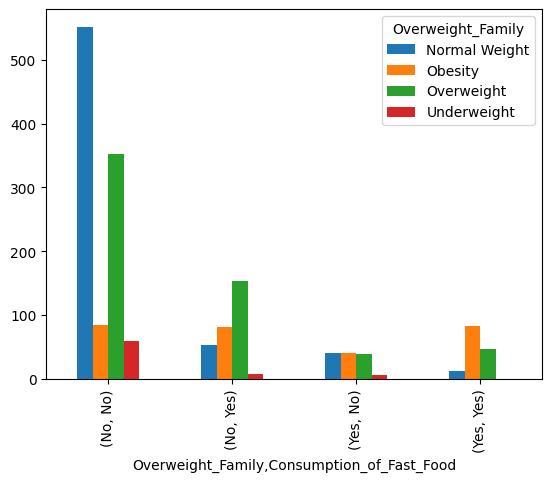

In [10]:
associativa.plot.bar()
plt.legend(title = 'Overweight_Family')

### Vegetable and fast food consumption effect on weight

In [11]:
select_columns_2 = df[['Frequency_of_Consuming_Vegetables', 'Consumption_of_Fast_Food', 'Class']]

In [12]:
associativa_2 = pd.crosstab(
    index=[select_columns_2['Frequency_of_Consuming_Vegetables'], select_columns_2['Consumption_of_Fast_Food']],
    columns=select_columns_2['Class']
)
associativa 

Class                                       Normal Weight  Obesity  \
Overweight_Family Consumption_of_Fast_Food                           
No                No                                  552       84   
                  Yes                                  53       81   
Yes               No                                   41       40   
                  Yes                                  12       82   

Class                                       Overweight  Underweight  
Overweight_Family Consumption_of_Fast_Food                           
No                No                               353           59  
                  Yes                              154            8  
Yes               No                                39            6  
                  Yes                               46            0

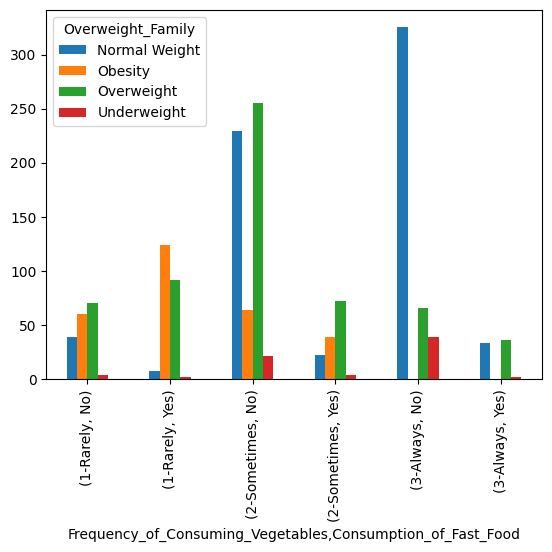

In [13]:
associativa_2.plot.bar()
plt.legend(title = 'Overweight_Family')

In [14]:
select_columns_3 = df_obsity[['Weekly_Physical_Activity', 'Frequency_of_Consuming_Vegetables', 'Calculation_of_Calorie_Intake','Liquid_Intake_Daily', 'Class']]

NameError: name 'df_obsity' is not defined

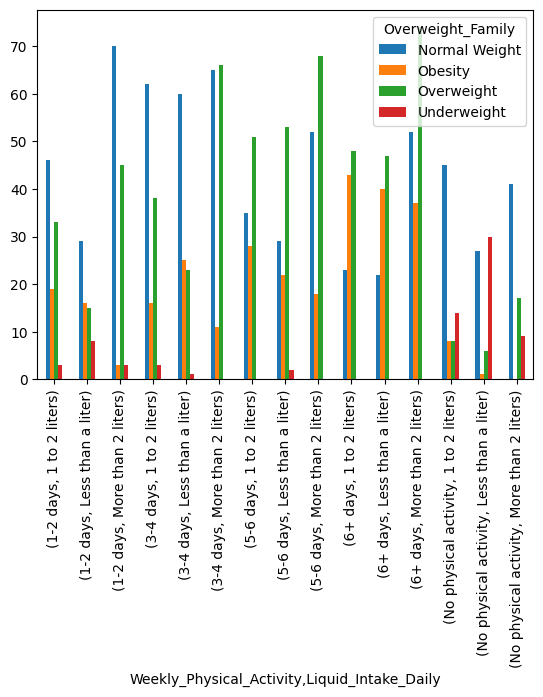

In [ ]:
associativa_3 = pd.crosstab(
    index=[select_columns_3['Weekly_Physical_Activity'],  select_columns_3['Liquid_Intake_Daily']],
    columns=select_columns_3['Class']
)
associativa_3
associativa_3.plot.bar()
plt.legend(title = 'Overweight_Family')